# PHAS0029 Session 2:  Histograms and normal distributions Ahmed Mohamed

_Author: louise.dash@ucl.ac.uk    
Updated: 19/12/2018_

<p><b>Intended learning outcomes:</b> </p>
By the end of this session, you should be able to:
<ul>
<li> Use Python to generate and plot a histogram; </li>
<li> Determine whether or not the data fits well to a normal distribution </li>
<li> Be able to determine a suitable bin size for a histogram </li>
</ul>


The task for this session is a "fill-in-the-blanks" style task. This notebook will guide you through what you need to do, and at various points you will find empty code cells that you need to complete in order to proceed.

<div class="alert alert-success"> <p>

<b>Instructions to you</b> are in green boxes like this one.

First of all, rename this notebook so that the title contains your name; when you have completed the task you will upload this notebook to Moodle.
</div>


## Getting started: Importing the data

The first thing we need to do is import the modules we will need. In this case we'll be using numpy and matplotlib.pyplot. We'll also tell the notebook to produce all the plots inside the notebook for convenience.

In [1]:
# The following line makes all plot output generate as images within the notebook. 
# This command should precede the import pyplot line
%matplotlib notebook

import numpy as np
import matplotlib.pyplot as plt

# See the discussion below for when you might want to uncomment this line.
#plt.rcParams["patch.force_edgecolor"] = True

<div class="alert alert-success"> 
We're going to import some data from a text file into an array using numpy's loadtxt function. 

Make sure you've downloaded the file "sampledata.txt" from Moodle, and that it is saved in the <b>same directory/folder as this notebook</b>. 

The file contains a single column of numbers representing the results of a series of measurements of the same quantity. 

Use `np.loadtxt` to import the contents of the file into an array called "`data`". 

To check that the file has imported correctly, output the array, and also the number of data points. 


Do this in the cell below:
</div>

In [2]:
data=np.loadtxt("sampledata.txt", unpack=True) # the values in the data file will be unpacked and assign to data
print(data)

[ 9.08784134 10.10662555 10.6043289   8.14670094 11.21532998 10.09371284
 10.4268221   9.512998    8.62930223  7.48937559 10.65366662 10.82957068
  8.78448663 10.9601158   9.90659032  9.1582816  10.44614588  8.83495279
 11.08507526 10.74786111 10.3768063   9.94925924 10.98840191  8.1845716
 11.11626203  9.93193642  8.24589252  9.60070141  9.59625026  8.75870124
 10.26599281 10.03072825  9.17414148 10.95249503  9.81645277  7.87208683
  9.59434022  9.22794451  8.60092591 11.04193271 10.55787516  9.75736188
  9.96894073 10.35909125  9.08197603  9.60704288 11.83643996 10.65500473
  9.55931389 11.79449148 11.52681481 11.22729724 10.86988402  9.84875052
 10.05911294 10.2443348   9.78448166 10.18996261  8.85726152 11.40313014
  9.30652172 10.15578731 10.89652947  9.37932207  9.60507078 10.38731808
  8.91990775  9.15388917 10.91798911  8.96221918  8.03327801 10.45508301
  7.76131074 10.03609924  9.5262954   9.14885299 10.25739095  9.89103726
  8.63909939 10.36168981  9.92134822 10.00209711 11.

If you've successfully imported the data, you should be able to see that the average value is around 10. We can easily calculate the average:

In [3]:
print("The mean of the data is ", np.mean(data)) #the mean of the data

The mean of the data is  9.793228122766692


### Creating a histogram

In theory, because our data is a set of repeated measurements of the same quantity, the distribution of the values should follow a Gaussian (normal) distribution, i.e. when we plot a histogram of the data, its shape should fit

$$ f(x) = \frac{1}{\sigma \sqrt{2\pi}} \exp \left[-\frac{(x-\bar{x})^2}{2\sigma^2}\right], $$
where $\bar{x}$ is the mean value of the data, and $\sigma$ the standard deviation.

To see if this is true, we'll first plot the data as a histogram. We'll use the `plt.hist` function to automatically sort the data into bins and plot the resulting histogram:

<IPython.core.display.Javascript object>


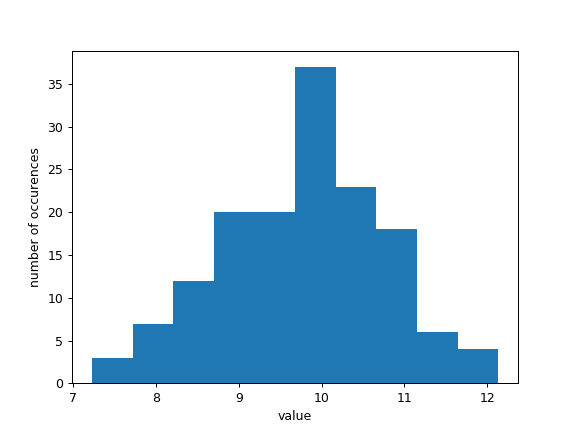

In [4]:
plt.figure()

plt.hist(data) #plots a hitogram of the data

#Plots the graph with all the necessitys
plt.xlabel("value")
plt.ylabel("number of occurences");

However, it's often useful to be able to see the outline of the histogram bins, which is turned off by default in Matplotlib 2. You can do this in one of two ways:

<IPython.core.display.Javascript object>


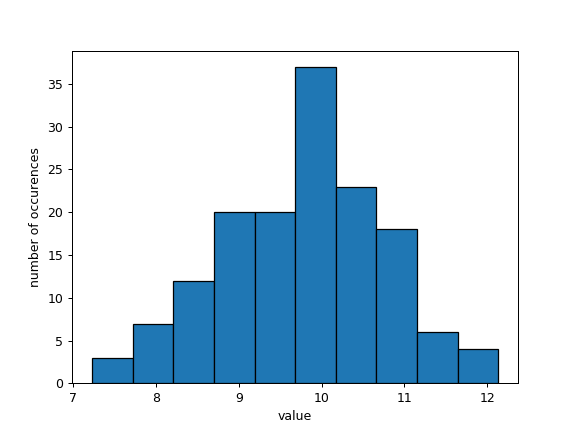

In [5]:
# 1. Include borders explicitly in the plt.hist statement:

plt.figure()
plt.hist(data, edgecolor='black') # you can set the edgecolor to anything, black is probably best
plt.xlabel("value")
plt.ylabel("number of occurences");

# 2. The following line will globally include borders in all plt.hist (and other bar-type plots) - 
# most useful if you include it in the preamble cell with the import statements 

#plt.rcParams["patch.force_edgecolor"] = True


By default, the matplotlib hist command puts the data into 10 bins. You can see all the possible options in the documentation https://matplotlib.org/2.2.3/api/_as_gen/matplotlib.pyplot.hist.html#matplotlib.pyplot.hist, but in general the only things you're likely to need to change are:
* The number of bins.
* Whether or not the histogram is normalised - in this case the integral of the histogram will be equal to 1. To use this, set the keyword argument `density=True`.

For example, this will sort the data into 15 bins, and normalize the histogram:

<IPython.core.display.Javascript object>


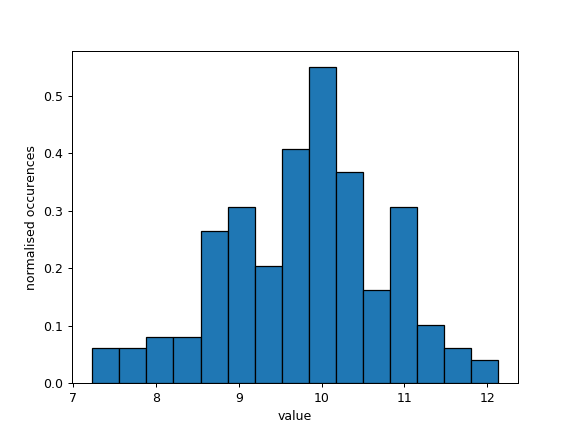

In [6]:
plt.figure()
# 15 bins, normalized:
plt.hist(data,bins=15,density=True,edgecolor='k') # 'k' as abbreviation for black.

plt.xlabel("value")
plt.ylabel("normalised occurences") ; # semicolon at end suppresses unwanted IPython <output>

### How well does this fit to a Gaussian?

Our data looks as though it may be roughly Gaussian. How can we check this?

We'll use another python module: `scipy.stats`, to find out. (Documentation link: https://docs.scipy.org/doc/scipy/reference/stats.html )

In [7]:
import scipy.stats as stats

Specifically, we'll use `norm.fit` to fit the data that we used in the histogram to a Gaussian, and give us the two parameters $\bar{x}$ and $\sigma$.

In [8]:
x0, sigma = stats.norm.fit(data) #fits data into a gaussian
print ("Fitted Gaussian: \n Mean value ", x0, "with standard deviation", sigma) #the mean and standerd deviation of the data

Fitted Gaussian: 
 Mean value  9.793228122766692 with standard deviation 0.97432217875081


We can see that we obtain the same mean as we got before from `np.mean()`.



<div class="alert alert-success"> 
Now we want to plot the fitted Gaussian on top of the histogram to see how good the fit is.<br> 

In the cell below, write a suitably-named function that will return a Gaussian 
$$y = \frac{1}{\sigma \sqrt{2\pi}} \exp \left[-\frac{(x-\bar{x})^2}{2\sigma^2}\right], $$
for an input $x, \bar{x}$, and $\sigma$.

Don't forget the docstring!
</div>

In [9]:
def gauss(x,x0,sigma): #definition of the gaussian function
    '''This function is used to return a gaussian function (y) from x values, the mean and the standers deviation'''
    y=(1/(sigma*np.sqrt(2*np.pi))*np.exp(-((x-x0)**2)/(2*(sigma**2))))
    return y # Returns y for x,x0 and sigma values

<div class="alert alert-success"> 
Now complete the cell below to:
<ol>
<li>use np.linspace to create an array of 100 x-values for the fitted line starting at 7 and finishing at 13</li>
    <li>Use your function to create a corresponding array of y-values with a Gaussian form.</li>
</ol>
</div>

In [10]:
x = np.linspace(7,13,100) #100 values from 7 to 13
print(x)
y = gauss(x,x0,sigma) # y values for the array of x values
print(y)

[ 7.          7.06060606  7.12121212  7.18181818  7.24242424  7.3030303
  7.36363636  7.42424242  7.48484848  7.54545455  7.60606061  7.66666667
  7.72727273  7.78787879  7.84848485  7.90909091  7.96969697  8.03030303
  8.09090909  8.15151515  8.21212121  8.27272727  8.33333333  8.39393939
  8.45454545  8.51515152  8.57575758  8.63636364  8.6969697   8.75757576
  8.81818182  8.87878788  8.93939394  9.          9.06060606  9.12121212
  9.18181818  9.24242424  9.3030303   9.36363636  9.42424242  9.48484848
  9.54545455  9.60606061  9.66666667  9.72727273  9.78787879  9.84848485
  9.90909091  9.96969697 10.03030303 10.09090909 10.15151515 10.21212121
 10.27272727 10.33333333 10.39393939 10.45454545 10.51515152 10.57575758
 10.63636364 10.6969697  10.75757576 10.81818182 10.87878788 10.93939394
 11.         11.06060606 11.12121212 11.18181818 11.24242424 11.3030303
 11.36363636 11.42424242 11.48484848 11.54545455 11.60606061 11.66666667
 11.72727273 11.78787879 11.84848485 11.90909091 11.9

The following cell will replot the (normalised) histogram, a blue line from your generated x and y, and another (red) line.

<IPython.core.display.Javascript object>


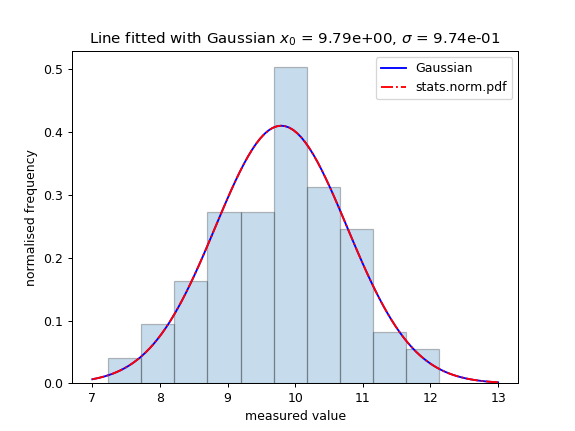

In [11]:
gaussian_check = stats.norm.pdf(x,x0,sigma) # see next text cell for explanation

plt.figure()
plt.hist(data, density=True,alpha=0.25,edgecolor='k') # plots the histogram with black edges and transparent bars
plt.plot(x,y,'b-', label='Gaussian') # Plots the gaussian line form x and y
plt.plot(x,gaussian_check,'r-.', label="stats.norm.pdf") #the generated gaussian line
plt.legend()
plt.xlabel('measured value')
plt.ylabel('normalised frequency')
title_label=('Line fitted with Gaussian $x_0$ = {0:8.2e}, $\sigma$ = {1:8.2e}'.format(x0,sigma))
# n.b. number format 8.2e : *e*xponential format, *8* chars total, with *2* decimal places
plt.title(title_label) ;

If you've done this correctly, you should find that the red dashed line matches *exactly* with your calculated line (the solid blue line). If it doesn't, go back and correct your `gaussian_fn` code until it does!

Let's look at how the red line was generated - it uses the `stats.norm.pdf` function, which generates the probability density function ("pdf"), i.e. a Gaussian, for the given values of x0 and sigma. It's probably easier to use than generating your own Gaussian, so in future you can use this if you wish.

Note also:
1. the extra option "alpha=0.25" in the hist function - this makes the histogram bars transparent, which makes the graph look a lot more visually clear when you're plotting lines on top of a histogram, or overlaying two histograms.
2. The title of the graph includes the fitted parameters by using a Python `.format`. This is often useful to be able to do, so feel free to copy and paste this formatting to other plots if you want.


### More data = a better fit?

We only have 150 data points at the moment. To give you an idea of how data distributions become more Gaussian as the data set size increases, we're going to generate some "fake" data so we can easily change the number of data points. 

The numpy function "random" will generate random numbers with a normal distribution for us.

In [12]:
npoints = 10000 # the number of data points we want
mean_x = 10     # roughly the same as the data set above
stdev = 1       # roughly the same as the data set above

# Our fake data set. Don't do this in a lab course!
new_data = np.random.normal(mean_x,stdev,npoints)

<div class="alert alert-success"> 

In the cell below, 
<ol>

<li>Use stats.norm.fit() to find the actual mean and standard deviation of new_data. Are these exactly equal to 10 and 1? Use a text cell to comment on this.</li>
<li>Use stats.norm.pdf() to generate a set of y-values (use the set of x-values you generated with `np.linspace()` in cell 10)</li>
<li>Plot a histogram of the data, with the fitted line on top (just as above).</li>
<li> Experiment with the number of points, `npoints` in the cell above.</li>
<li>Experiment with the number of bins. Do more bins always give better results?</li>
<li><b>Use further text and code cells to demonstrate your results for two or three different scenarios</b> (i.e. vary the bin ranges and/or the number of data points).</li>
<li>Make sure all your plots are labelled (either on the plot itself or in `print()` outputs) with:
    <ul>
    <li>the number of datapoints;</li>
    <li>the number of bins; </li>
    <li>the values of $x_0$ and $\sigma$,</li>
    </ul>
    for each dataset.</li>
</ol>
</div>

In [13]:
x1, sigma1 = stats.norm.fit(new_data)
print ("Fitted Gaussian: \n Mean value ", x1, "with standard deviation", sigma1) #the mean and standerd deviation of the data

Fitted Gaussian: 
 Mean value  10.004486040878273 with standard deviation 0.9990316264947797


The mean is not exactly 10 but is closer to 10 than the original data as there are more data points. This is because the more points there are the closer the mean will get to 10. This is also true for the standerd deviasion and getting close to 1.

<IPython.core.display.Javascript object>


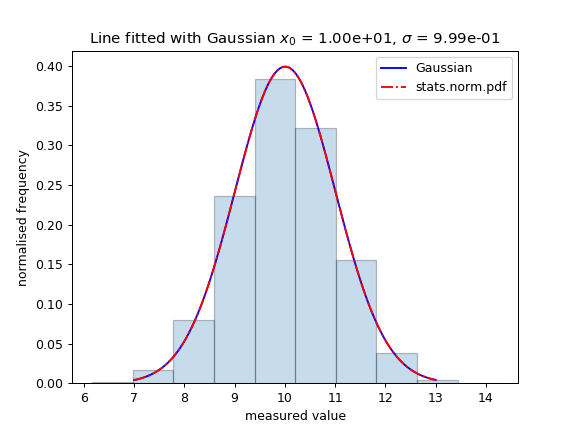

In [14]:
x = np.linspace(7,13,100)
y1 = gauss(x,x1,sigma1)

gaussian_check = stats.norm.pdf(x,x1,sigma1) # see next text cell for explanation

plt.figure()
plt.hist(new_data, density=True,alpha=0.25,edgecolor='k')# plots the histogram with black edges and transparent bars
plt.plot(x,y1,'b-', label='Gaussian')# Plots the gaussian line form x and y
plt.plot(x,gaussian_check,'r-.', label="stats.norm.pdf")#the generated gaussian line
plt.legend()
plt.xlabel('measured value')
plt.ylabel('normalised frequency')
title_label=('Line fitted with Gaussian $x_0$ = {0:8.2e}, $\sigma$ = {1:8.2e}'.format(x1,sigma1))
# n.b. number format 8.2e : *e*xponential format, *8* chars total, with *2* decimal places
plt.title(title_label) ;

# Scenario 1

Exploring how the graph will be affected with when there are alot more data points.

In [15]:
npoints = 1000000 # Testing 1000000 data points
mean_x = 10     # roughly the same as the data set above
stdev = 1       # roughly the same as the data set above

# Our fake data set. Don't do this in a lab course!
new_data1 = np.random.normal(mean_x,stdev,npoints)

In [16]:
x2, sigma2 = stats.norm.fit(new_data1)
print ("Fitted Gaussian: \n Mean value ", x2, "with standard deviation", sigma2)

Fitted Gaussian: 
 Mean value  10.000037094182321 with standard deviation 1.0002142463509798


<IPython.core.display.Javascript object>


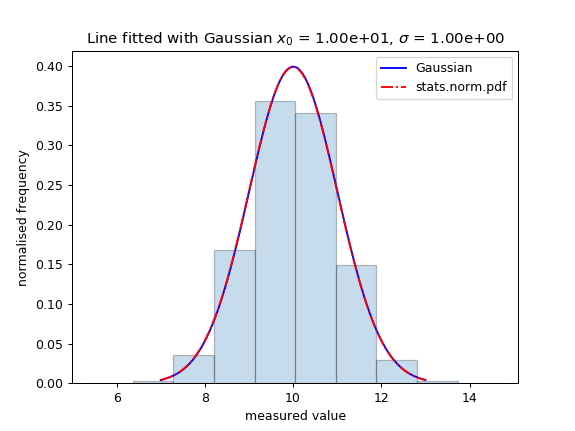

In [17]:
x = np.linspace(7,13,100)
y2 = gauss(x,x2,sigma2)

gaussian_check = stats.norm.pdf(x,x2,sigma2) # see next text cell for explanation

plt.figure()
plt.hist(new_data1, density=True,alpha=0.25,edgecolor='k')# plots the histogram with black edges and transparent bars
plt.plot(x,y1,'b-', label='Gaussian')# Plots the gaussian line form x and y
plt.plot(x,gaussian_check,'r-.', label="stats.norm.pdf")#the generated gaussian line
plt.legend()
plt.xlabel('measured value')
plt.ylabel('normalised frequency')
title_label=('Line fitted with Gaussian $x_0$ = {0:8.2e}, $\sigma$ = {1:8.2e}'.format(x2,sigma2))
# n.b. number format 8.2e : *e*xponential format, *8* chars total, with *2* decimal places
plt.title(title_label) ;

The histogram is more accurate as the mean and standerd deviation are as close to 10 and 1 as possible without dictating the number of bins as the number of data points is maximised.

# Scenario 2

Exploring how the graph will be affected when there are alot more data points and bins.

In [18]:
npoints = 1000000 # testing 10 data points
mean_x = 10     # roughly the same as the data set above
stdev = 1       # roughly the same as the data set above

# Our fake data set. Don't do this in a lab course!
new_data2 = np.random.normal(mean_x,stdev,npoints)

In [19]:
x3, sigma3 = stats.norm.fit(new_data2)
print ("Fitted Gaussian: \n Mean value ", x3, "with standard deviation", sigma3)

Fitted Gaussian: 
 Mean value  9.999295486193223 with standard deviation 1.0001281822744925


<IPython.core.display.Javascript object>


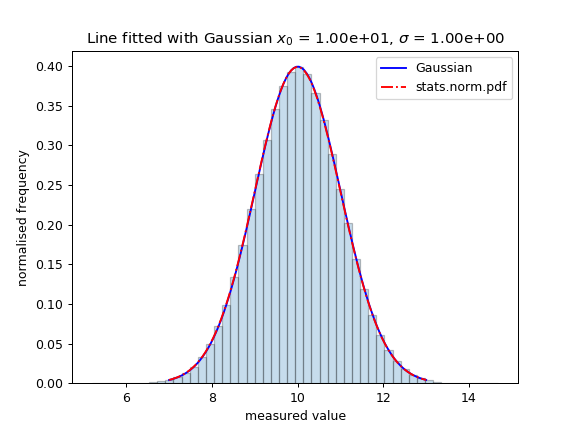

In [20]:
x = np.linspace(7,13,100)
y2 = gauss(x,x3,sigma3)

gaussian_check = stats.norm.pdf(x,x3,sigma3) # see next text cell for explanation

plt.figure()
plt.hist(new_data2, bins=50, density=True,alpha=0.25,edgecolor='k')# plots the histogram with black edges and transparent bars
plt.plot(x,y1,'b-', label='Gaussian')# Plots the gaussian line form x and y
plt.plot(x,gaussian_check,'r-.', label="stats.norm.pdf")#the generated gaussian line
plt.legend()
plt.xlabel('measured value')
plt.ylabel('normalised frequency')
title_label=('Line fitted with Gaussian $x_0$ = {0:8.2e}, $\sigma$ = {1:8.2e}'.format(x2,sigma2))
# n.b. number format 8.2e : *e*xponential format, *8* chars total, with *2* decimal places
plt.title(title_label) ;

This is the best scenario in my 3 examples as the number of bins is high and the number of points is maximised

# Scenario 3

Exploring how the graph will be affected when there are less data points and more bins.

In [21]:
npoints = 1000 # testing 10 data points
mean_x = 10     # roughly the same as the data set above
stdev = 1       # roughly the same as the data set above

# Our fake data set. Don't do this in a lab course!
new_data2 = np.random.normal(mean_x,stdev,npoints)

In [22]:
x3, sigma3 = stats.norm.fit(new_data2)
print ("Fitted Gaussian: \n Mean value ", x3, "with standard deviation", sigma3)

Fitted Gaussian: 
 Mean value  10.00724016535094 with standard deviation 1.0184395473781362


<IPython.core.display.Javascript object>


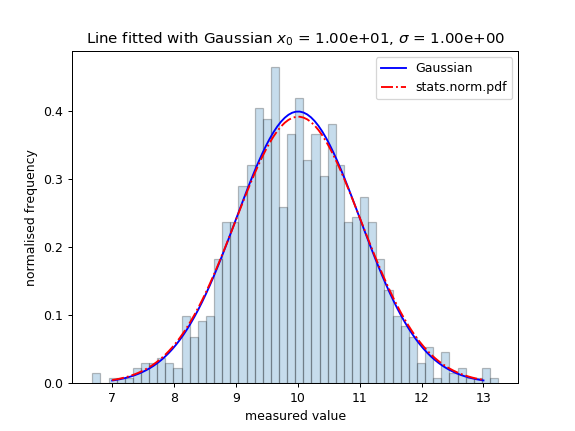

In [23]:
x = np.linspace(7,13,100)
y2 = gauss(x,x3,sigma3)

gaussian_check = stats.norm.pdf(x,x3,sigma3) # see next text cell for explanation

plt.figure()
plt.hist(new_data2, bins=50, density=True,alpha=0.25,edgecolor='k')# plots the histogram with black edges and transparent bars
plt.plot(x,y1,'b-', label='Gaussian')# Plots the gaussian line form x and y
plt.plot(x,gaussian_check,'r-.', label="stats.norm.pdf")#the generated gaussian line
plt.legend()
plt.xlabel('measured value')
plt.ylabel('normalised frequency')
title_label=('Line fitted with Gaussian $x_0$ = {0:8.2e}, $\sigma$ = {1:8.2e}'.format(x2,sigma2))
# n.b. number format 8.2e : *e*xponential format, *8* chars total, with *2* decimal places
plt.title(title_label) ;

This is the worst scenario even though the number of bins is high the number of data points is too low to get an accurat mean and standerd deviation.

# Conclusion

From the 3 senarios above I was able to deduce that by increasing the number of data points the histogram became more accurate and lined up with the stats.norm.pdf better as the mean and standerd deviasion get closer to 10 and 1 respectivly. By increasing the number of bins the accuracy of the histogram also increases as their are more bars however this is only true when the number of data points is suitable like senario 2 however in senario 3 the number of data points is too small for the increased number of bins to have an affect.

### When will I need to use this?

Fitting a histogram to a Gaussian is particularly useful when you've fitted some data and want to check how good the fit is. If a fit models the data well, we'd expect the distribution of the *residuals* to be Gaussian.

<div class="alert alert-info"> **Residual**: the (vertical) distance between the data point and the fitted line - we looked at this when we were doing least squares fits in PHAS1240. </div>

This is fairly intuitive. For a good fit, we'd expect roughly as many data points above our fitted line as below, and for most of the data points to be close to the line, with fewer further away.

In sessions 3 and 4, we'll be fitting data to functions, and then using the distribution of the residuals to consider *quantitatively* how well a function fits to our data. 